# STA130 Group Project Individual Proposals

# Research Question 1:

## Research Question Statement: 

How does age affect body self-image dissatisfaction related to height?

## Variables for Q1

1.DEMO_age (Age):

Description: This variable represents the age of each participant. Age is a continuous variable.

Usage: This variable will be used to analyze how body image satisfaction (specifically height dissatisfaction) varies across different ages. It will be plotted on the x-axis of a scatter plot with a trend line to show if age has a trend with body dissatisfaction.

Suggested Visualization: Scatter Plot with Trend Line (Age vs. Height Dissatisfaction Score)

Explanation: A scatter plot with age on the x-axis and height dissatisfaction on the y-axis will help us see if there’s a trend or relationship between age and height dissatisfaction. Adding a trend line will help identify whether dissatisfaction tends to increase, decrease, or remain steady with age.

Here is the visualization code:

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("CSCS_data_anon.csv",low_memory=False)


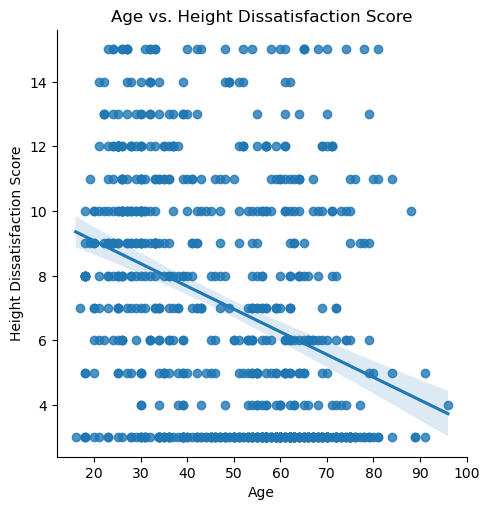

In [46]:
# Filter to only include non-null values for age and height dissatisfaction score
df_age_height = df.dropna(subset=['DEMO_age', 'PSYCH_body_self_image_questionnaire_height_dissatisfaction_score'])

# Scatter plot with trend line for Age vs. Height Dissatisfaction Score
sns.lmplot(data=df_age_height, x='DEMO_age', y='PSYCH_body_self_image_questionnaire_height_dissatisfaction_score')
plt.title('Age vs. Height Dissatisfaction Score')
plt.xlabel('Age')
plt.ylabel('Height Dissatisfaction Score')
plt.show()



2.PSYCH_body_self_image_questionnaire_height_dissatisfaction_score (Height Dissatisfaction Score):

Description: This score represents the level of dissatisfaction each participant feels regarding their height. It is a numeric variable, where higher scores likely indicate greater dissatisfaction.

Usage: This variable will be plotted on the y-axis of the scatter plot against age to see if dissatisfaction with height changes as people age. The trend line will help visualize if dissatisfaction generally increases, decreases, or remains steady with age.

Suggested Visualization: Box Plot (Age Groups vs. Height Dissatisfaction Score)

Explanation: Grouping ages into categories (e.g., 10-20, 20-30) and displaying dissatisfaction scores as a box plot can show how dissatisfaction varies across age groups. This visualization highlights differences in central tendencies and variability between age groups.

Here is the visualization code:

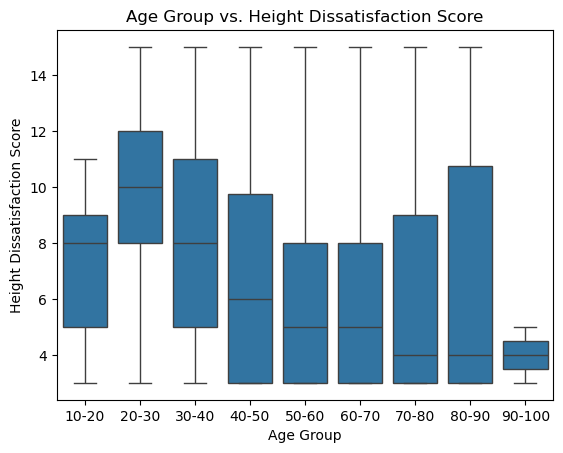

In [48]:
# Filter data for non-null pairs in age and height dissatisfaction score
df_age_height = df.dropna(subset=['DEMO_age', 'PSYCH_body_self_image_questionnaire_height_dissatisfaction_score']).copy()

# Create age groups using .loc to avoid SettingWithCopyWarning
df_age_height.loc[:, 'age_group'] = pd.cut(df_age_height['DEMO_age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                                           labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

# Box plot for age groups vs. Height Dissatisfaction Score
sns.boxplot(data=df_age_height, x='age_group', y='PSYCH_body_self_image_questionnaire_height_dissatisfaction_score')
plt.title('Age Group vs. Height Dissatisfaction Score')
plt.xlabel('Age Group')
plt.ylabel('Height Dissatisfaction Score')
plt.show()


## Analysis Approach for Q1: Simple Linear Regression

Description: I will use simple linear regression to see if there’s a linear relationship between age (DEMO_age) and height dissatisfaction score (PSYCH_body_self_image_questionnaire_height_dissatisfaction_score). Linear regression will give you a slope and intercept, helping you understand if age tends to increase or decrease dissatisfaction.

Assumptions: Assumes a linear relationship between age and height dissatisfaction. Additionally, it assumes homoscedasticity (constant variance) and that residuals are normally distributed.

Interpretation: If the p-value for the slope is low (e.g., < 0.05), it suggests that age has a significant effect on height dissatisfaction. The direction of the slope (positive or negative) indicates if dissatisfaction increases or decreases with age.

In [17]:
import statsmodels.api as sm

# Drop rows with NaNs in the relevant columns
df_cleaned = df.dropna(subset=['DEMO_age', 'PSYCH_body_self_image_questionnaire_height_dissatisfaction_score'])

# Set up the independent (X) and dependent (y) variables
X = df_cleaned['DEMO_age']
y = df_cleaned['PSYCH_body_self_image_questionnaire_height_dissatisfaction_score']
X = sm.add_constant(X)  # Add constant term for intercept

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                                                   OLS Regression Results                                                   
Dep. Variable:     PSYCH_body_self_image_questionnaire_height_dissatisfaction_score   R-squared:                       0.109
Model:                                                                          OLS   Adj. R-squared:                  0.108
Method:                                                               Least Squares   F-statistic:                     92.56
Date:                                                              Fri, 01 Nov 2024   Prob (F-statistic):           9.53e-21
Time:                                                                      23:24:33   Log-Likelihood:                -2038.1
No. Observations:                                                               758   AIC:                             4080.
Df Residuals:                                                                   756   BIC:                             4090.


## Hypothesis and Expected Results for Q1:

Hypothesis: 
Age is hypothesized to be negatively associated with height dissatisfaction. Older individuals may feel less dissatisfaction with their height due to changing perspectives and reduced emphasis on physical appearance over time.

Expected Results:

    Visualization Interpretation: In the scatter plot of Age vs. Height Dissatisfaction Score with a trend line, we expect to see a downward-sloping line if there’s a negative correlation. This would indicate that as age increases, height dissatisfaction decreases.
    
    Statistical Analysis: If the correlation test yields a significant negative correlation coefficient, it would quantitatively confirm the visual trend. A significant p-value here would support the hypothesis that age and height dissatisfaction are inversely related.
   
These results would suggest that height dissatisfaction might be age-dependent, potentially guiding mental health professionals to consider age-specific interventions for body image concerns. This could also indicate that older individuals have developed a more accepting view of their body image over time.

# Research Question 2:

Is there a significant difference in neuroticism scores between individuals who identify as LGBTQ+ and those who do not?

## Variables for Q2

DEMO_identity_lgbtq (LGBTQ+ Identity):

Description: This is a categorical variable indicating whether or not a participant identifies as LGBTQ+. It likely has two categories: one representing those who identify as LGBTQ+ and another for those who do not.

Usage: This variable will be used to split participants into two groups (LGBTQ+ and non-LGBTQ+) to examine if there is a difference in neuroticism scores between these groups. It will be plotted on the x-axis of a violin plot.

Suggested Visualization: Violin Plot (LGBTQ+ Identity vs. Neuroticism Score)

Explanation: A violin plot can reveal the density and distribution of neuroticism scores for LGBTQ+ and non-LGBTQ+ individuals. This helps in understanding how scores are spread within each group and if there is any notable difference in neuroticism levels.

Here is the visualization code:

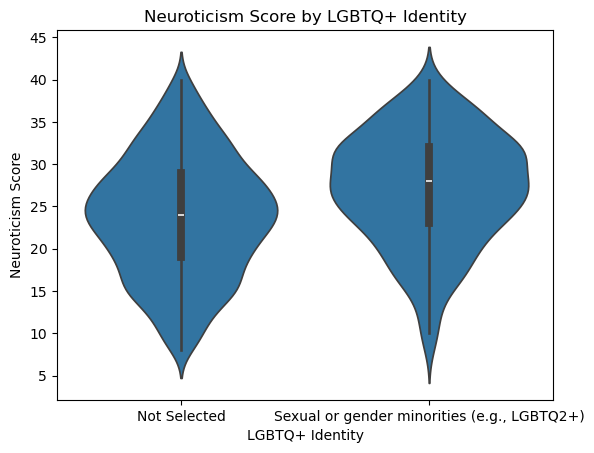

In [49]:
# Filter data for non-null values in LGBTQ+ identity and neuroticism score
df_lgbtq_neuroticism = df.dropna(subset=['DEMO_identity_lgbtq', 'PSYCH_big_five_inventory_neurotic_score'])

# Violin plot for neuroticism score by LGBTQ+ identity
sns.violinplot(data=df_lgbtq_neuroticism, x='DEMO_identity_lgbtq', y='PSYCH_big_five_inventory_neurotic_score')
plt.title('Neuroticism Score by LGBTQ+ Identity')
plt.xlabel('LGBTQ+ Identity')
plt.ylabel('Neuroticism Score')
plt.show()


PSYCH_big_five_inventory_neurotic_score (Neuroticism Score):

Description: This score represents a participant’s level of neuroticism, which is a personality trait linked to emotional stability. Higher neuroticism scores often indicate higher levels of emotional instability or susceptibility to stress.

Usage: This variable will be plotted on the y-axis of the violin plot, allowing us to see the distribution of neuroticism scores within each group (LGBTQ+ and non-LGBTQ+). The density of the plot will show where scores concentrate within each group, helping to identify potential differences in neuroticism.

Suggested Visualization: Box Plot (LGBTQ+ Identity vs. Neuroticism Score)

Explanation: A box plot shows the median, quartiles, and any outliers of neuroticism scores within LGBTQ+ and non-LGBTQ+ groups. This makes it easy to compare central tendencies and variability in scores across groups.

Here is the visualization code:

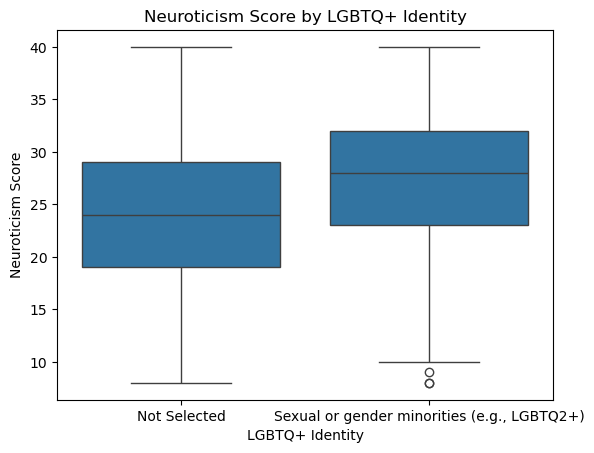

In [51]:
# Filter data for non-null values in LGBTQ+ identity and neuroticism score
df_lgbtq_neuroticism = df.dropna(subset=['DEMO_identity_lgbtq', 'PSYCH_big_five_inventory_neurotic_score'])

# Box plot for neuroticism score by LGBTQ+ identity
sns.boxplot(data=df_lgbtq_neuroticism, x='DEMO_identity_lgbtq', y='PSYCH_big_five_inventory_neurotic_score')
plt.title('Neuroticism Score by LGBTQ+ Identity')
plt.xlabel('LGBTQ+ Identity')
plt.ylabel('Neuroticism Score')
plt.show()


## Analysis Approach for Q2: Hypothesis Testing with t-test

Description: Perform an independent t-test to compare the mean neuroticism scores between LGBTQ+ and non-LGBTQ+ individuals. This will tell us if there is a statistically significant difference between the two groups.

Assumptions: Assumes both groups are normally distributed and have equal variances.

Interpretation: A significant p-value (e.g., < 0.05) suggests a difference in neuroticism scores between LGBTQ+ and non-LGBTQ+ groups.

In [25]:
from scipy.stats import ttest_ind

# Step 1: Remove rows with NaNs in either DEMO_identity_lgbtq or PSYCH_big_five_inventory_neurotic_score
df_cleaned = df.dropna(subset=['DEMO_identity_lgbtq', 'PSYCH_big_five_inventory_neurotic_score'])

# Step 2: Split data into LGBTQ+ (Sexual or gender minorities) and non-LGBTQ+ (Not Selected) groups
lgbtq_group = df_cleaned[df_cleaned['DEMO_identity_lgbtq'] == 'Sexual or gender minorities (e.g., LGBTQ2+)']['PSYCH_big_five_inventory_neurotic_score'].dropna()
non_lgbtq_group = df_cleaned[df_cleaned['DEMO_identity_lgbtq'] == 'Not Selected']['PSYCH_big_five_inventory_neurotic_score'].dropna()

# Step 3: Check if the groups have data and perform the t-test if they do
if lgbtq_group.size > 0 and non_lgbtq_group.size > 0:
    t_stat, p_value = ttest_ind(lgbtq_group, non_lgbtq_group)
    print(f'T-test result: t={t_stat}, p-value={p_value}')
else:
    print("One or both groups are empty after filtering. Cannot perform t-test.")


T-test result: t=9.00209626685812, p-value=4.882412911423274e-19


## Hypothesis and Expected Results for Q1:

Hypothesis: 
LGBTQ+ individuals are expected to have higher neuroticism scores than non-LGBTQ+ individuals, possibly due to unique stressors related to social and personal identity.

Expected Results:
    
    Visualization Interpretation: In the box plot comparing neuroticism scores by LGBTQ+ identity, we would expect to see higher median and interquartile range (IQR) values for LGBTQ+ individuals if they indeed have higher neuroticism scores. This visual difference would provide an initial indication of disparity between the two groups.
    
    Statistical Analysis: If the t-test results in a significant difference in means with a low p-value, it would confirm that LGBTQ+ individuals have significantly higher neuroticism scores than non-LGBTQ+ individuals. This would validate the visual observation with statistical evidence.

If confirmed, these findings would imply a potential mental health disparity influenced by identity. This insight could help mental health practitioners develop targeted interventions to support LGBTQ+ individuals, acknowledging the added stressors they may face.

# Research Question 3:

Do Canadian provinces show differences in extraversion scores?

## Variables for Q3

GEO_province (Province):

Description: This variable indicates the Canadian province of residence for each participant. It is a categorical variable with each province represented as a unique category.

Usage: This variable will group participants by province to compare extraversion scores. It will be displayed on the x-axis of a box plot, showing the range and central tendencies of extraversion scores for each province.

Suggested Visualization: Box Plot (Province vs. Extraversion Score)

Explanation: A box plot for each province shows the distribution of extraversion scores, highlighting any regional differences in central tendency and variability. This visualization helps identify whether certain provinces have higher or lower average extraversion scores.

Here is the visualization code:


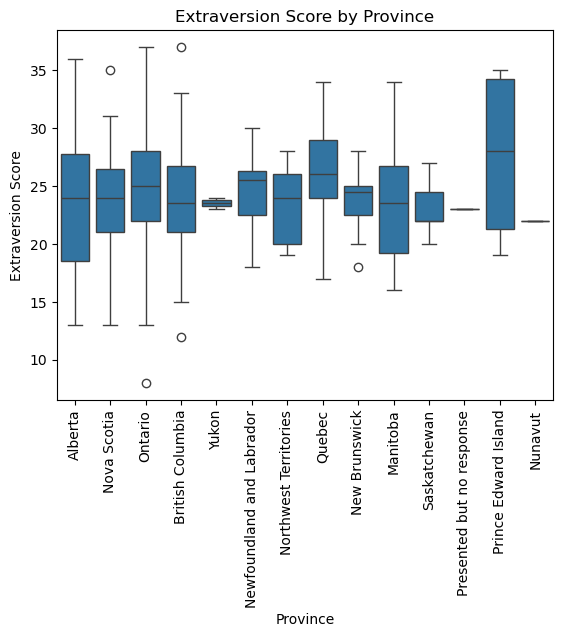

In [53]:
# Filter data for non-null values in province and extraversion score
df_province_extraversion = df.dropna(subset=['GEO_province', 'PSYCH_big_five_inventory_extraverted_score'])

# Box plot for extraversion score by province
sns.boxplot(data=df_province_extraversion, x='GEO_province', y='PSYCH_big_five_inventory_extraverted_score')
plt.title('Extraversion Score by Province')
plt.xlabel('Province')
plt.ylabel('Extraversion Score')
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.show()


PSYCH_big_five_inventory_extraverted_score (Extraversion Score):

Description: This score measures the extraversion level of participants. Extraversion is a personality trait that reflects social engagement, assertiveness, and energetic behavior. Higher scores indicate higher levels of extraversion.

Usage: This variable will be plotted on the y-axis of the box plot, showing the distribution of extraversion scores within each province. The box plot will reveal any notable differences in extraversion between provinces, such as variations in average scores or outliers.

Suggested Visualization: Bar Plot of Average Extraversion by Province

Explanation: A bar plot can show the average extraversion score for each province, making it easy to compare provinces at a glance. This highlights which regions score higher or lower on extraversion.

Here is the visualization code:

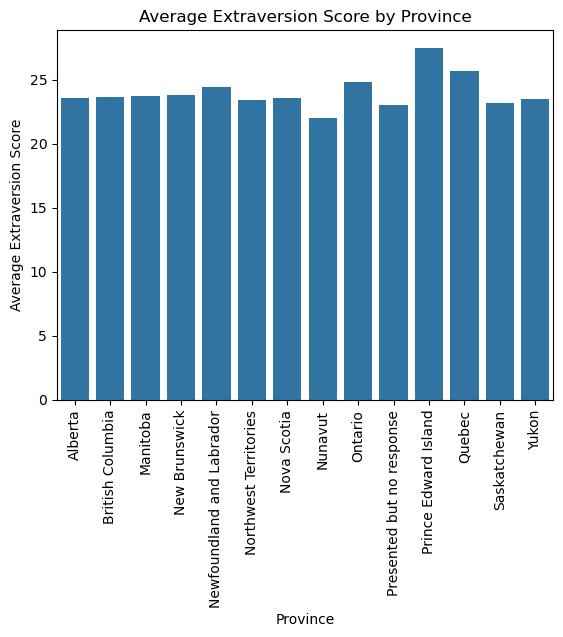

In [54]:
# Filter data for non-null values in province and extraversion score
df_province_extraversion = df.dropna(subset=['GEO_province', 'PSYCH_big_five_inventory_extraverted_score'])

# Calculate average extraversion score by province
avg_extraversion = df_province_extraversion.groupby('GEO_province')['PSYCH_big_five_inventory_extraverted_score'].mean().reset_index()

# Bar plot for average extraversion score by province
sns.barplot(data=avg_extraversion, x='GEO_province', y='PSYCH_big_five_inventory_extraverted_score')
plt.title('Average Extraversion Score by Province')
plt.xlabel('Province')
plt.ylabel('Average Extraversion Score')
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.show()


## Analysis Approach for Q3: Analysis of Variance

Description: Use ANOVA to test if there are statistically significant differences in extraversion scores across provinces. ANOVA will compare the means across all provinces and tell you if at least one province has a different mean score.

Assumptions: Assumes normal distribution of extraversion scores within each province and homogeneity of variances.

Interpretation: A significant p-value (e.g., < 0.05) indicates that at least one province has a different mean extraversion score compared to others.

In [29]:
from scipy.stats import f_oneway

# Step 1: Count non-NaN values for each province in the extraversion score column
# This helps us identify provinces with valid data for analysis
province_counts = df.groupby('GEO_province')['PSYCH_big_five_inventory_extraverted_score'].count()
print("Non-NaN values per province:")
print(province_counts)

# Step 2: Filter provinces to include only those with at least one valid extraversion score
valid_provinces = province_counts[province_counts > 0].index
province_groups = [df['PSYCH_big_five_inventory_extraverted_score'][df['GEO_province'] == province].dropna() 
                   for province in valid_provinces]

# Step 3: Perform ANOVA test across the valid provinces
anova_result = f_oneway(*province_groups)

# Step 4: Output the ANOVA results
print(f'ANOVA result: F={anova_result.statistic}, p-value={anova_result.pvalue}')


Non-NaN values per province:
GEO_province
Alberta                      30
British Columbia             42
Manitoba                     10
New Brunswick                10
Newfoundland and Labrador    12
Northwest Territories         5
Nova Scotia                  15
Nunavut                       1
Ontario                      86
Presented but no response     1
Prince Edward Island          4
Quebec                       29
Saskatchewan                  7
Yukon                         2
Name: PSYCH_big_five_inventory_extraverted_score, dtype: int64
ANOVA result: F=0.5290018423934784, p-value=0.9054921361730062


## Hypothesis and Expected Results for Q3:

Hypothesis: 
Extraversion scores may vary across provinces, with certain provinces potentially displaying higher or lower average extraversion due to regional cultural differences.

Expected Results:

    Visualization Interpretation: In the bar plot of average extraversion scores by province, we would expect to see variability across provinces if cultural differences influence extraversion. Provinces with visibly higher or lower bars would indicate differences in average extraversion levels.
    
    Statistical Analysis: If the ANOVA test yields a significant F-statistic with a low p-value, it would confirm that the observed differences in extraversion scores across provinces are statistically significant. This would provide a robust conclusion that regional culture might play a role in shaping extraversion.

Confirming these differences would suggest that personality traits, like extraversion, could vary by region. This finding could inform regional mental health and social programs, ensuring that interventions align with local cultural norms and personality traits.